<a href="https://colab.research.google.com/github/GaboLara998/ProyectoIntegrador/blob/main/Analisis_de_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Librerías para el manejo de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Métricas de rendimiento
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, f1_score, roc_auc_score

In [6]:
from sklearn.preprocessing import MinMaxScaler

#Funcion de cargar datasets
def cargar_datos(link):
    datos = pd.read_csv(link,index_col='id')
    return datos

#Links datasets
link_training = "https://raw.githubusercontent.com/GaboLara998/ProyectoIntegrador/main/DataSet_UNSW_NB15/UNSW_NB15_training-set.csv?token=GHSAT0AAAAAACMBWAOFBU5CFZ67HIDC2XLOZO7JZMA"
link_testing = "https://raw.githubusercontent.com/GaboLara998/ProyectoIntegrador/main/DataSet_UNSW_NB15/UNSW_NB15_testing-set.csv?token=GHSAT0AAAAAACMBWAOFEFKXDJN42NYN2ZDAZO7JXNA"

# Cargar los datos
datos_training = cargar_datos(link_training)
datos_testing = cargar_datos(link_testing)

# Crear un dataset mas grande
dataFinal = pd.concat([datos_training,datos_testing])
dataFinal = dataFinal.reset_index(drop=True)
dataFinal.info()
dataFinal.shape
dataFinal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
257669,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
257670,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
257671,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [7]:
#Eliminar columnas de proto state
dataFinal.drop(columns=['service','proto','state'],inplace=True)
# La columna de ataque seguirá siendo categórica pero también se le asignan códigos
dataFinal['attack_cat'] = pd.Categorical(dataFinal['attack_cat']).codes
dataFinal.info()
#dataFinal.dropna(inplace=True)
dataFinal.shape
dataFinal.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   spkts              257673 non-null  int64  
 2   dpkts              257673 non-null  int64  
 3   sbytes             257673 non-null  int64  
 4   dbytes             257673 non-null  int64  
 5   rate               257673 non-null  float64
 6   sttl               257673 non-null  int64  
 7   dttl               257673 non-null  int64  
 8   sload              257673 non-null  float64
 9   dload              257673 non-null  float64
 10  sloss              257673 non-null  int64  
 11  dloss              257673 non-null  int64  
 12  sinpkt             257673 non-null  float64
 13  dinpkt             257673 non-null  float64
 14  sjit               257673 non-null  float64
 15  djit               257673 non-null  float64
 16  sw

dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [8]:
dataFinal.info()

 # Imprimir el número de puntos de datos en el conjunto de entrenamiento
print(f"Número de datos en el conjunto de entrenamiento: {dataFinal.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   spkts              257673 non-null  int64  
 2   dpkts              257673 non-null  int64  
 3   sbytes             257673 non-null  int64  
 4   dbytes             257673 non-null  int64  
 5   rate               257673 non-null  float64
 6   sttl               257673 non-null  int64  
 7   dttl               257673 non-null  int64  
 8   sload              257673 non-null  float64
 9   dload              257673 non-null  float64
 10  sloss              257673 non-null  int64  
 11  dloss              257673 non-null  int64  
 12  sinpkt             257673 non-null  float64
 13  dinpkt             257673 non-null  float64
 14  sjit               257673 non-null  float64
 15  djit               257673 non-null  float64
 16  sw

attack_cat
5    58871
3    44525
4    24246
2    16353
7    13987
0     2677
1     2329
8     1511
9      174
Name: count, dtype: int64


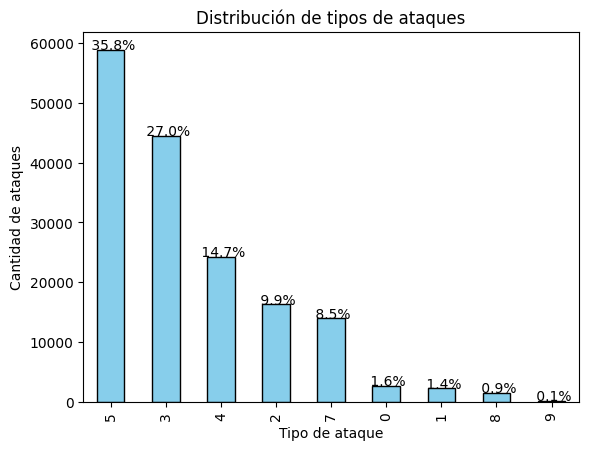

In [9]:
#Recorrer los diferentes tipos de ataques
print(dataFinal[dataFinal['label']==1]
     ['attack_cat']
     .value_counts()
)

# Crear una serie con los conteos de cada tipo de ataque
attack_counts = dataFinal[dataFinal['label']==1]['attack_cat'].value_counts()

# Calcular el porcentaje que cada tipo de ataque representa del total
attack_percentages = attack_counts / attack_counts.sum() * 100

# Crear un DataFrame con los conteos y los porcentajes
attack_df = pd.DataFrame({'counts': attack_counts, 'percentage': attack_percentages})

# Crear un gráfico de barras con los conteos de cada tipo de ataque
attack_df['counts'].plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir los porcentajes encima de cada barra
for i, percentage in enumerate(attack_df['percentage']):
    plt.text(i, attack_df['counts'].iloc[i], f' {percentage:.1f}%', ha='center')

# Añadir títulos y etiquetas
plt.title('Distribución de tipos de ataques')
plt.xlabel('Tipo de ataque')
plt.ylabel('Cantidad de ataques')

# Mostrar el gráfico
plt.show()


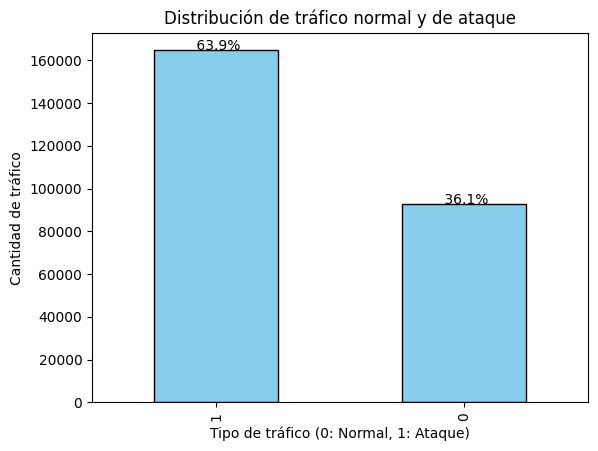

In [10]:
# Crear una serie con los conteos de tráfico normal y de ataque
label_counts = dataFinal['label'].value_counts()

# Calcular el porcentaje que cada tipo de tráfico representa del total
label_percentages = label_counts / label_counts.sum() * 100

# Crear un DataFrame con los conteos y los porcentajes
label_df = pd.DataFrame({'counts': label_counts, 'percentage': label_percentages})

# Crear un gráfico de barras con los conteos de cada tipo de tráfico
label_df['counts'].plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir los porcentajes encima de cada barra
for i, percentage in enumerate(label_df['percentage']):
    plt.text(i, label_df['counts'].iloc[i], f' {percentage:.1f}%', ha='center')

# Añadir títulos y etiquetas
plt.title('Distribución de tráfico normal y de ataque')
plt.xlabel('Tipo de tráfico (0: Normal, 1: Ataque)')
plt.ylabel('Cantidad de tráfico')

# Mostrar el gráfico
plt.show()

In [ ]:
#Mostrar distribucion de las variables en el dataset
for column in X.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(X[column], kde=True)
    plt.title('Distribución de ' + column)
    plt.show()